In [1]:
##Auto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df_custom = pd.read_csv("Auto.csv")
df_custom.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df_custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [ ]:
df_custom['horsepower'] = df_custom['horsepower'].replace({"?":df_custom['horsepower'].mode()[0]})
df_custom['horsepower'] = df_custom['horsepower'].astype(int)
df_custom.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
df_custom.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,105.042821,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.583776,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


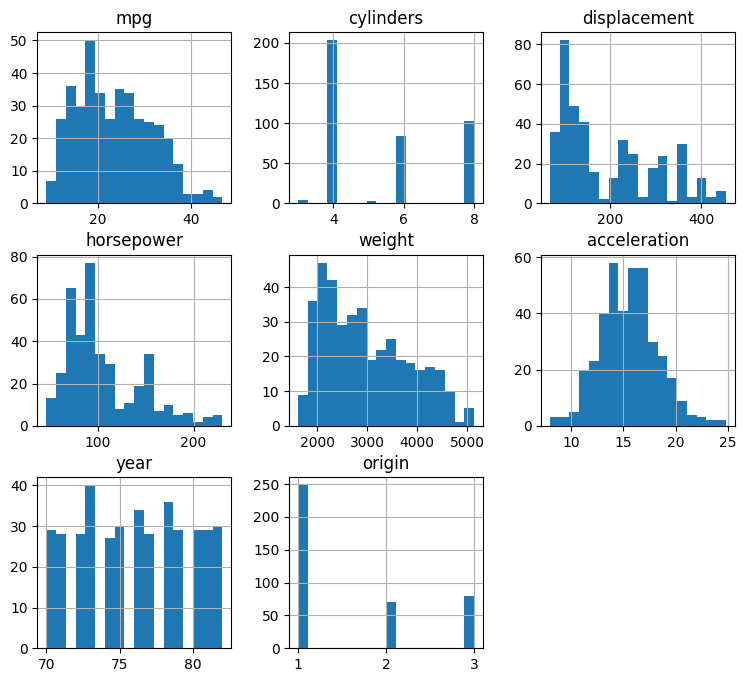

In [ ]:
df_custom.hist(figsize=(9,8),bins=18)
plt.show()

In [ ]:
X = df_custom[['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df_custom['mpg']
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

     displacement  cylinders  horsepower  weight  acceleration  year  origin
0           307.0          8         130    3504          12.0    70       1
1           350.0          8         165    3693          11.5    70       1
2           318.0          8         150    3436          11.0    70       1
3           304.0          8         150    3433          12.0    70       1
4           302.0          8         140    3449          10.5    70       1
..            ...        ...         ...     ...           ...   ...     ...
392         140.0          4          86    2790          15.6    82       1
393          97.0          4          52    2130          24.6    82       2
394         135.0          4          84    2295          11.6    82       1
395         120.0          4          79    2625          18.6    82       1
396         119.0          4          82    2720          19.4    82       1

[397 rows x 7 columns]


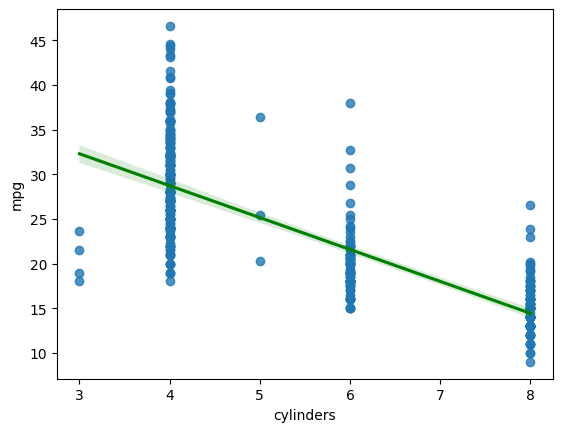

In [ ]:
sns.regplot(x='cylinders', y='mpg',data=df_custom, line_kws={"color": "green"})
plt.show()

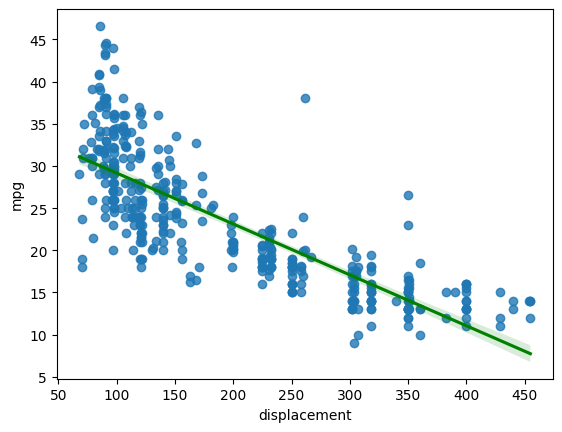

In [ ]:
sns.regplot(x='displacement', y='mpg',data=df_custom, line_kws={"color": "green"})
plt.show()

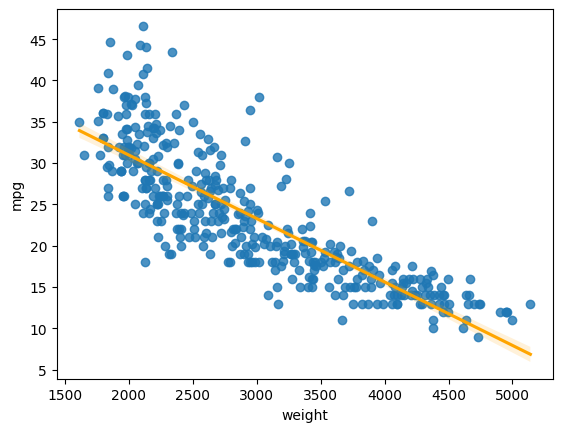

In [ ]:
sns.regplot(x='weight', y='mpg',data=df_custom, line_kws={"color": "orange"})
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
reg_custom = Lasso(alpha = 0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("regressor score lasso test\t", reg.score(X_test, y_test))
print("regressor score lasso training\t", reg.score(X_train, y_train))

regressor score lasso test	 0.8066732364614195
regressor score lasso training	 0.8211588091231565


In [ ]:
from sklearn.linear_model import Ridge
regrdg = Ridge(alpha = 0.1)
regr.fit(X_train,y_train)
yr_pred = regr.predict(X_test)
print("regressor score ridge test\t", regr.score(X_test, y_test))
print("regressor score ridge train\t", regr.score(X_train, y_train))

regressor score ridge test	 0.8066732364614195
regressor score ridge train	 0.8211588091231565


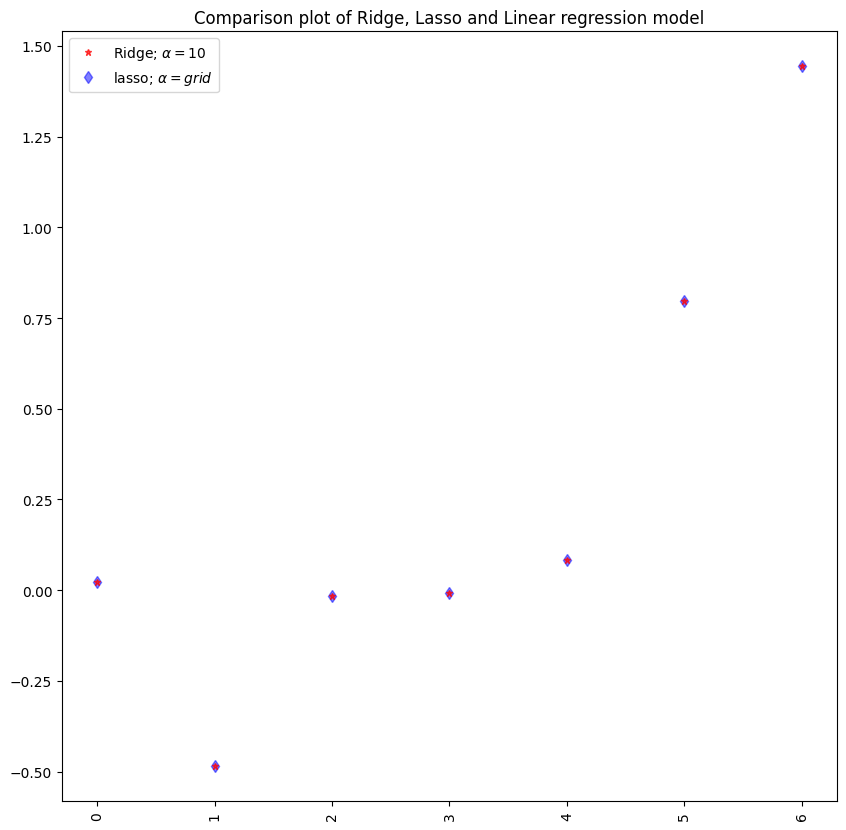

In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(regr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(reg.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')


#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

In [ ]:
##Boston

In [ ]:
##IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the data
data = pd.read_csv('/content/Boston.csv')
data.head() #Viewing 1st 5 rows of the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#TO SEE THE SHAPE OF THE DATA
data.shape

(506, 14)

In [ ]:
#Getting the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()# to get the statistical infor about the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
data.isnull().sum()#TO SEE THE NULL VALUES

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
#creating a seperate column in the dataframe which has value which is above and below median
crim_med = (data["crim"] > data["crim"].median()).map({False: 0, True: 1})
data["crim_med"] = crim_med
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_med
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0


In [ ]:
data.corr()["crim"] #To see the correlation of the data

crim        1.000000
zn         -0.200469
indus       0.406583
chas       -0.055892
nox         0.420972
rm         -0.219247
age         0.352734
dis        -0.379670
rad         0.625505
tax         0.582764
ptratio     0.289946
black      -0.385064
lstat       0.455621
medv       -0.388305
crim_med    0.409395
Name: crim, dtype: float64

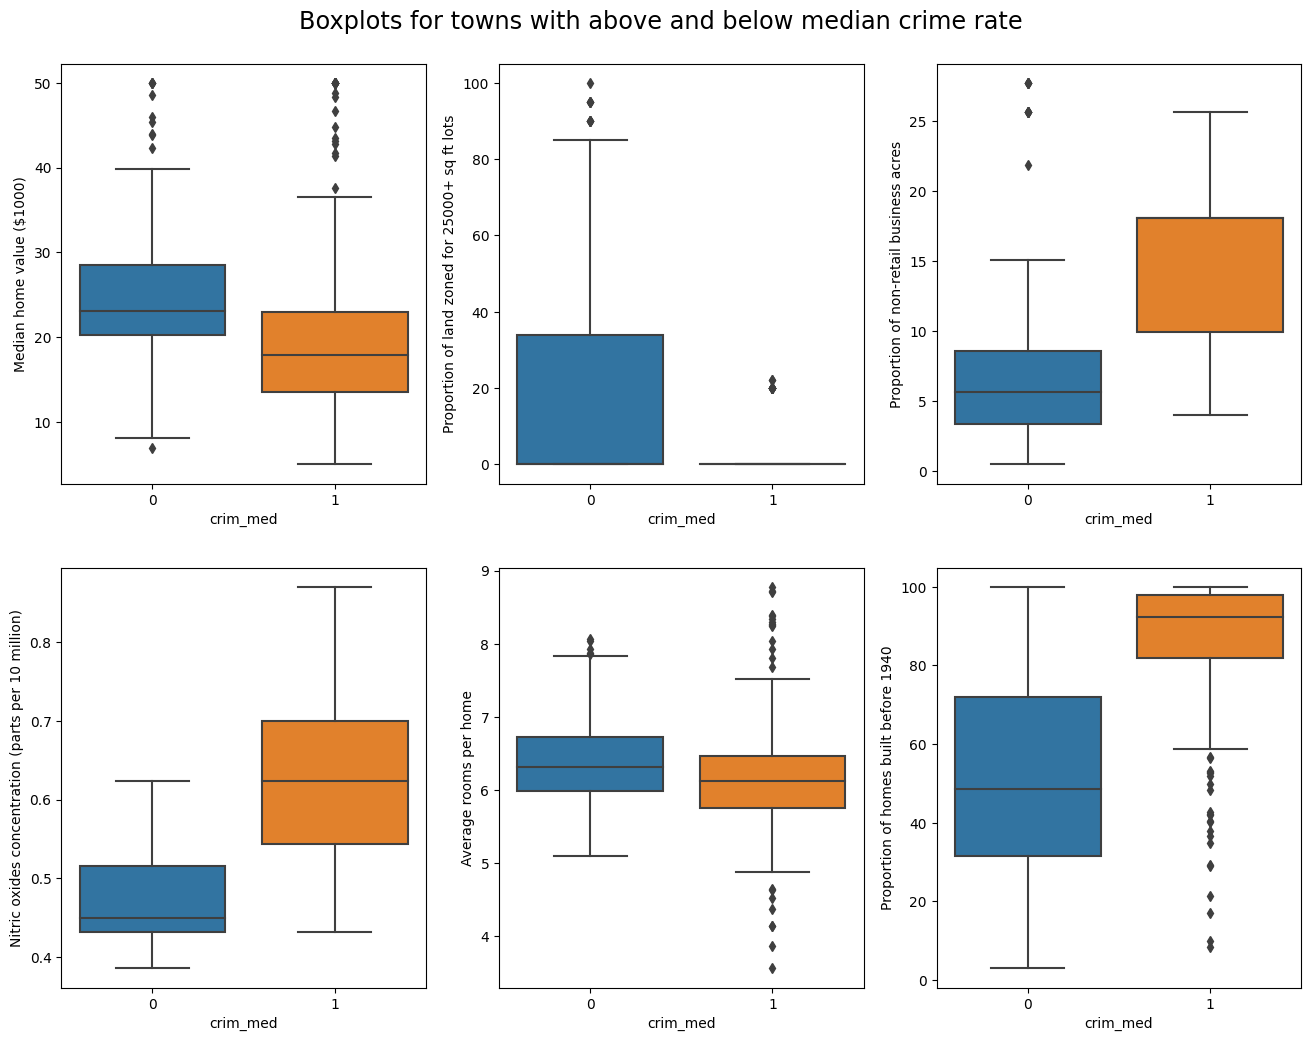

In [ ]:
#To plot the box and whisker plot
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "crim_med", y = "medv", data = data, ax = axes[0, 0])
axes[0, 0].set_ylabel("Median home value ($1000)")
sns.boxplot(x = "crim_med", y = "zn", data = data, ax = axes[0, 1])
axes[0, 1].set_ylabel("Proportion of land zoned for 25000+ sq ft lots")
sns.boxplot(x = "crim_med", y = "indus", data = data, ax = axes[0, 2])
axes[0, 2].set_ylabel("Proportion of non-retail business acres")
sns.boxplot(x = "crim_med", y = "nox", data = data, ax = axes[1, 0])
axes[1, 0].set_ylabel("Nitric oxides concentration (parts per 10 million)")
sns.boxplot(x = "crim_med", y = "rm", data = data, ax = axes[1, 1])
axes[1, 1].set_ylabel("Average rooms per home")
sns.boxplot(x = "crim_med", y = "age", data = data, ax = axes[1, 2])
axes[1, 2].set_ylabel("Proportion of homes built before 1940")
fig.suptitle("Boxplots for towns with above and below median crime rate", size = "xx-large", y = 0.925);


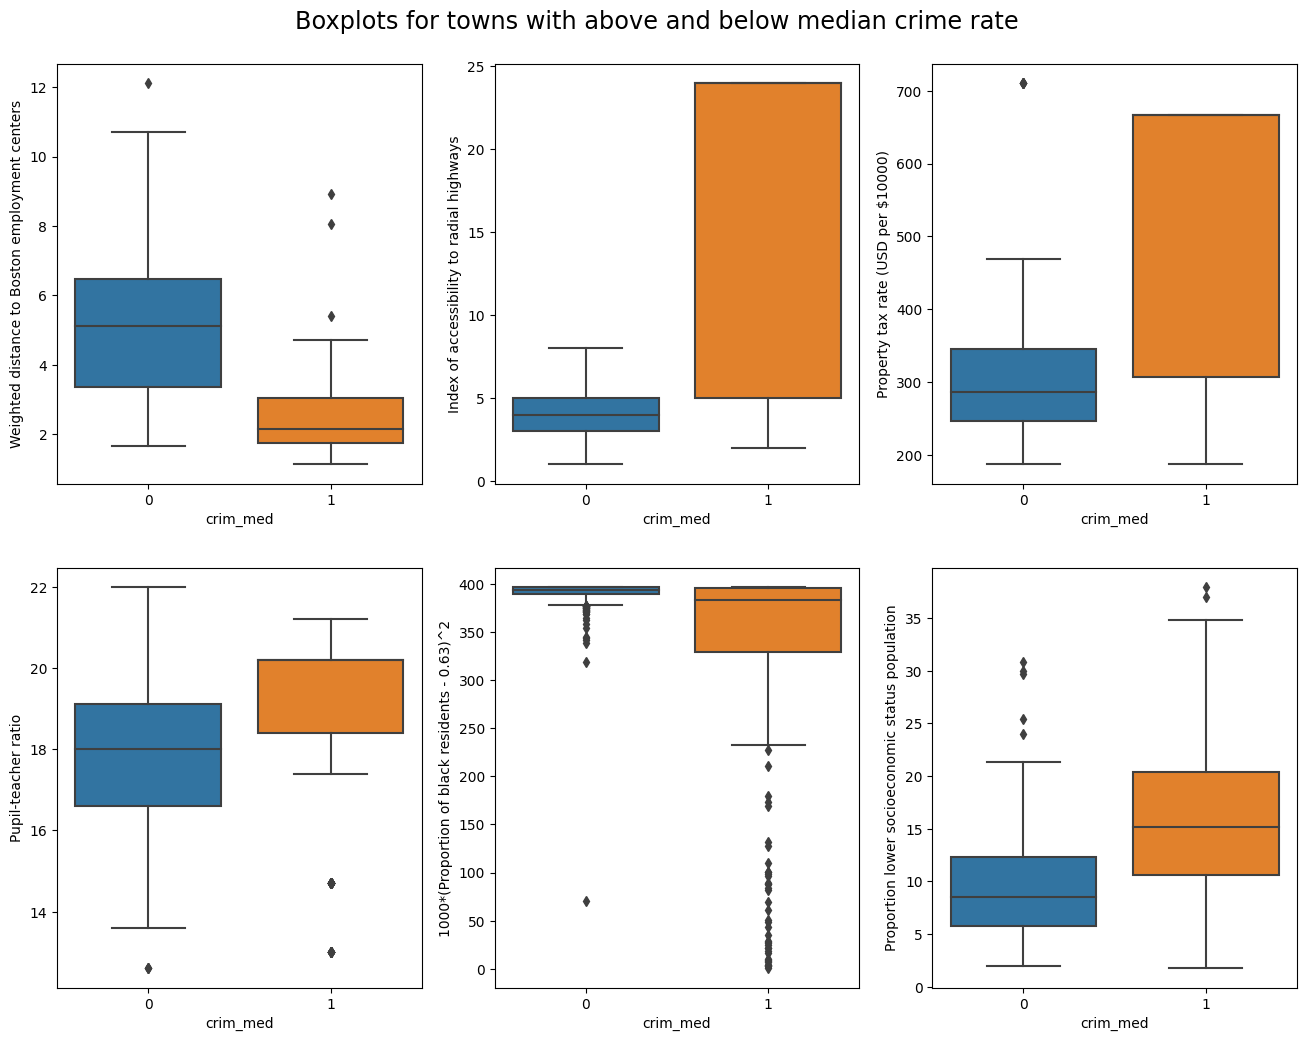

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "crim_med", y = "dis", data = data, ax = axes[0, 0])
axes[0, 0].set_ylabel("Weighted distance to Boston employment centers")
sns.boxplot(x = "crim_med", y = "rad", data = data, ax = axes[0, 1])
axes[0, 1].set_ylabel("Index of accessibility to radial highways")
sns.boxplot(x = "crim_med", y = "tax", data = data, ax = axes[0, 2])
axes[0, 2].set_ylabel("Property tax rate (USD per $10000)")
sns.boxplot(x = "crim_med", y = "ptratio", data = data, ax = axes[1, 0])
axes[1, 0].set_ylabel("Pupil-teacher ratio")
sns.boxplot(x = "crim_med", y = "black", data = data, ax = axes[1, 1])
axes[1, 1].set_ylabel("1000*(Proportion of black residents - 0.63)^2")
sns.boxplot(x = "crim_med", y = "lstat", data = data, ax = axes[1, 2])
axes[1, 2].set_ylabel("Proportion lower socioeconomic status population")
fig.suptitle("Boxplots for towns with above and below median crime rate", size = "xx-large", y = 0.925);

<Axes: >

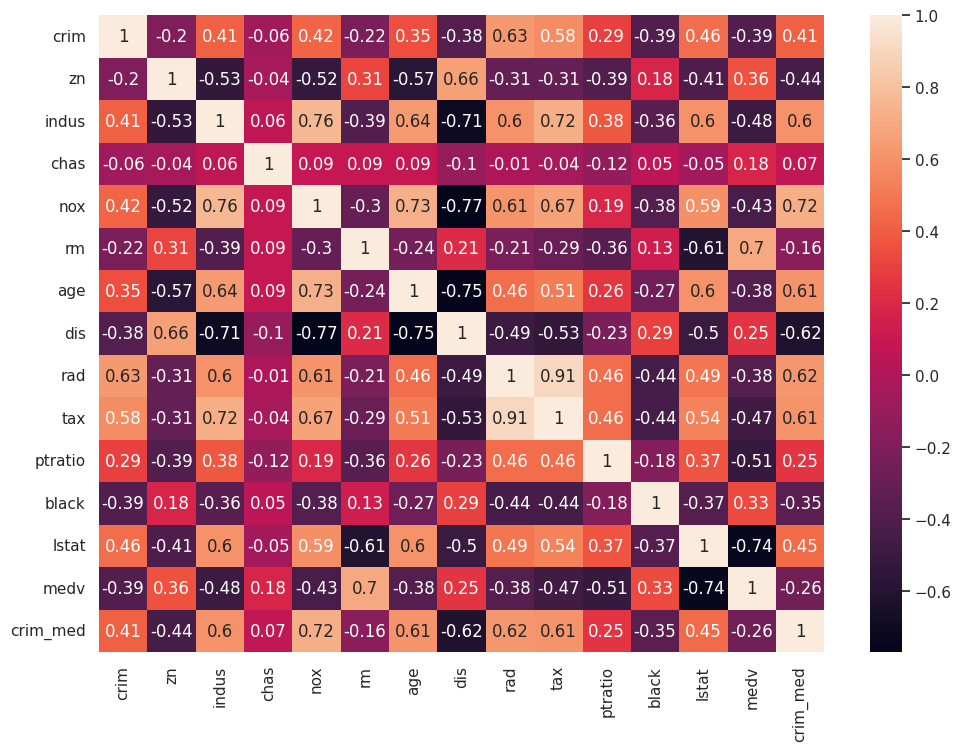

In [ ]:
#PLOTTING THE HEATMAP
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)#TO SEE THE HIGHLY CORRELATED VALUES

     feature         VIF
0       crim    2.131428
1         zn    2.920967
2      indus   14.513748
3       chas    1.176340
4        nox   80.070400
5         rm  136.796242
6        age   21.903488
7        dis   15.462682
8        rad   16.256148
9        tax   62.190801
10   ptratio   87.691565
11     black   21.577664
12     lstat   12.627871
13      medv   24.689191
14  crim_med    4.915128


In [ ]:
# deleting the columns with lager correlation
data = data.drop(columns = ["rm","ptratio","nox","tax"])

In [ ]:
data.corr()["crim"]#AFTER DELETING THE HIGHLY CORRELATED COLUMNS SEEING THE CORRELATION AGAIN

crim        1.000000
zn         -0.200469
indus       0.406583
chas       -0.055892
age         0.352734
dis        -0.379670
rad         0.625505
black      -0.385064
lstat       0.455621
medv       -0.388305
crim_med    0.409395
Name: crim, dtype: float64

<Axes: >

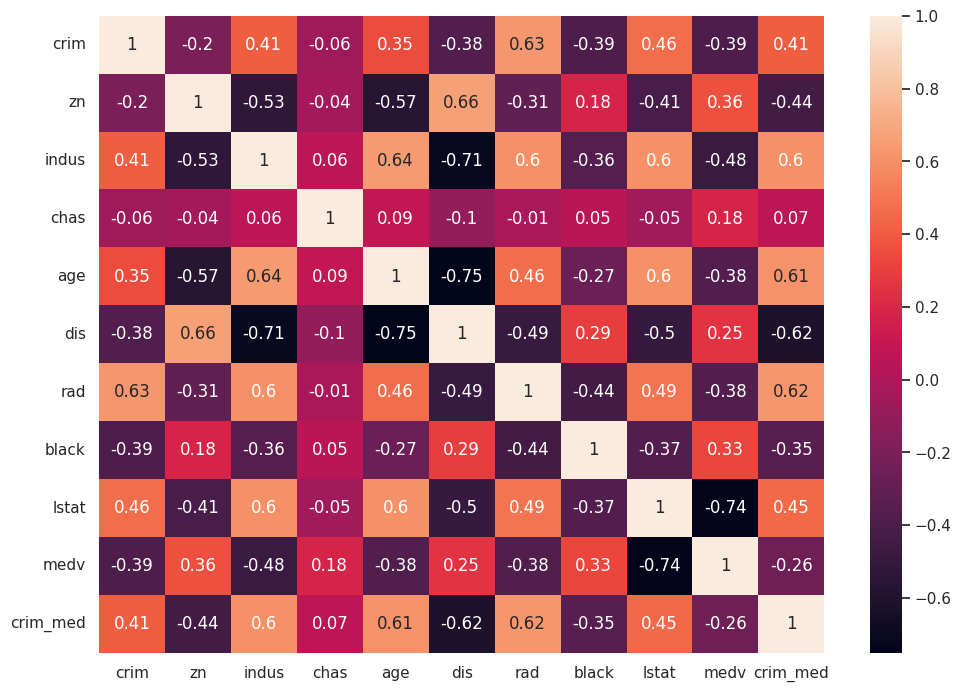

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

     feature        VIF
0       crim   2.103319
1         zn   2.471690
2      indus   9.156571
3       chas   1.143117
4        age  17.449413
5        dis   8.885747
6        rad   5.468680
7      black  18.312477
8      lstat  10.941604
9       medv  11.588130
10  crim_med   4.514699


In [ ]:
data.columns #cOLUMNS AFTER DELETING THE HIGHLY COORELATED COLUMNS

Index(['crim', 'zn', 'indus', 'chas', 'age', 'dis', 'rad', 'black', 'lstat',
       'medv', 'crim_med'],
      dtype='object')

In [ ]:
#Divide the data into X and Y
X = data.drop(columns = ["crim_med"])
Y = data["crim_med"]
print(X.shape)
print(Y)

(506, 10)
0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: crim_med, Length: 506, dtype: int64


In [ ]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg = model_reg.fit(X_train,Y_train)
Y_pred = model_reg.predict(X_test)
Y_train_pred = model_reg.predict(X_train)

In [ ]:
for i in range(len(Y_pred)):
    if(Y_pred[i] < 0.5):
        Y_pred[i] = 0
    else:
        Y_pred[i] = 1

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 score : %.2f" % r2_score(Y_test,Y_pred))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))

R2 score : 0.25
Mean squared error: 0.19


[[45  8]
 [11 38]]
0.8137254901960784


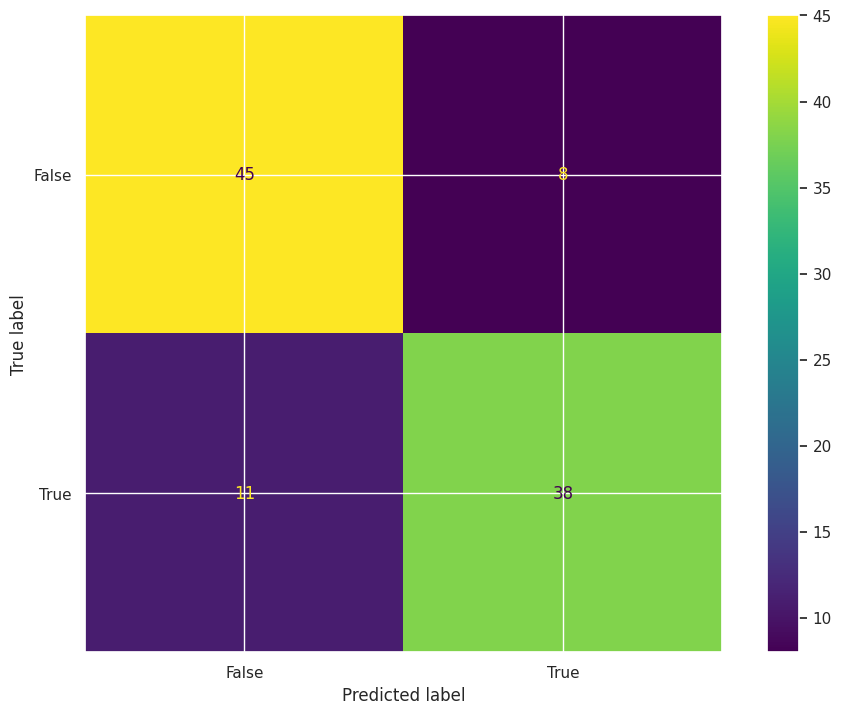

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
#CALCULATING THE ACCURACY OF LINEAR REGRESSION TESTING DATA
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0])
print(accuracy)
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


In [ ]:
# Now we do the same for Y_train
for i in range(len(Y_train_pred)):
    if(Y_train_pred[i] < 0.5):
        Y_train_pred[i] = 0
    else:
        Y_train_pred[i] = 1

[[183  17]
 [ 44 160]]


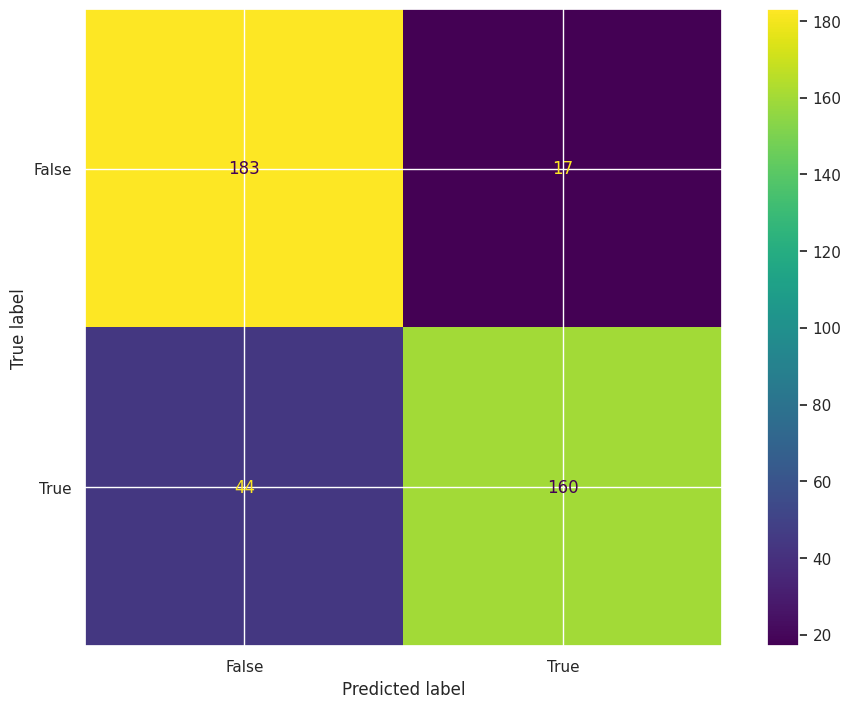

In [ ]:
cm_train = confusion_matrix(Y_train, Y_train_pred)
print(cm_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#CALCULATING THE ACCURACY OF LINEAR REGRESSION TRAINING DATA
accuracy = (cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1] + cm_train[0][1]+cm_train[1][0])
print(accuracy)

0.849009900990099


In [ ]:
reg_coeff = model_reg.coef_
reg_intercept = model_reg.intercept_
print(reg_coeff)
print(reg_intercept)

[ 0.00037981 -0.00094907  0.01280105 -0.00412964  0.00525867 -0.01168553
  0.0195593  -0.00036874  0.00392519  0.00824843]
-0.23925016148496625


In [ ]:
# Linear Discriminant Analysis
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Fitting the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA = model_LDA.fit(X_train,Y_train)
Y_pred_LDA = model_LDA.predict(X_test)
print(Y_pred_LDA)

[1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0]


[[45  8]
 [11 38]]


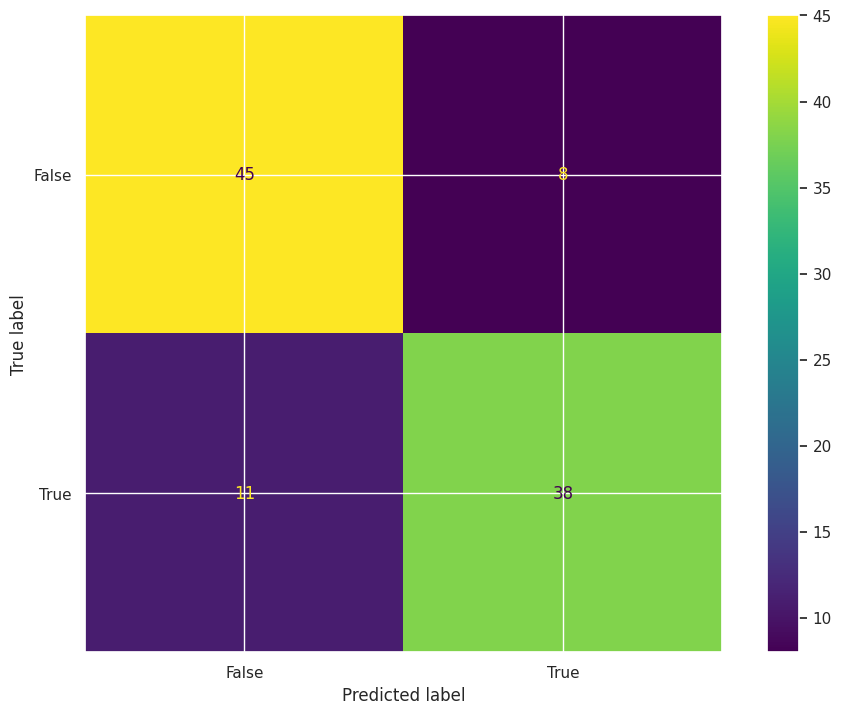

In [ ]:
#CONFUSION MATRIX FOR LDA MODEL
cm_LDA = confusion_matrix(Y_test,Y_pred_LDA)
print(cm_LDA)
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_LDA, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#CALCULATING THE ACCURACY OF LDA TESTING DATA
accuracy_LDA = (cm_LDA[0][0]+cm_LDA[1][1])/(cm_LDA[0][0]+cm_LDA[1][1] + cm_LDA[0][1]+cm_LDA[1][0])
print(accuracy_LDA)

0.8137254901960784


[[183  17]
 [ 44 160]]


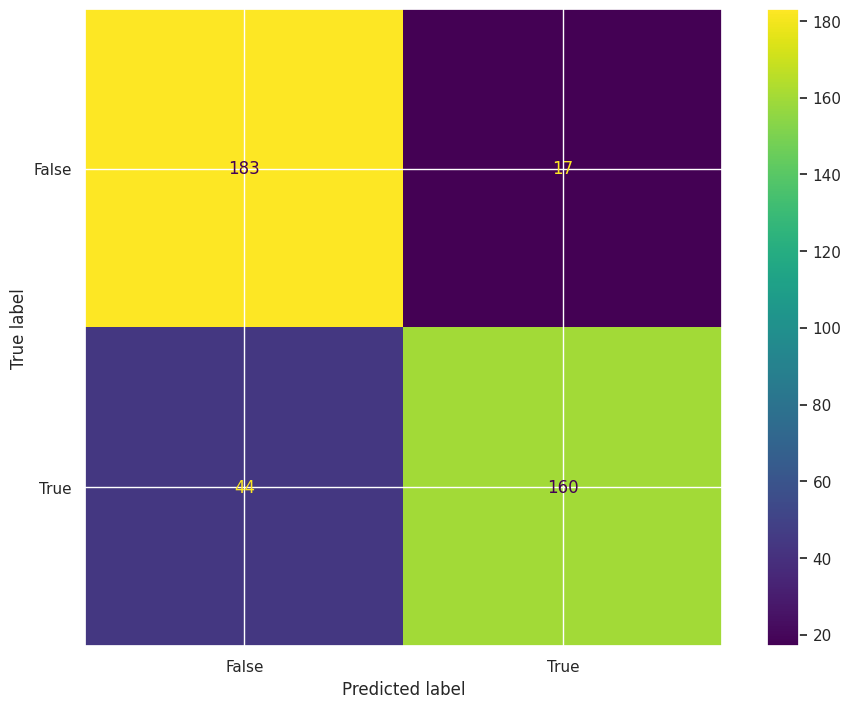

In [ ]:
Y_pred_train_LDA = model_LDA.predict(X_train)
cm_train_LDA = confusion_matrix(Y_train,Y_pred_train_LDA)
print(cm_train_LDA)
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train_LDA, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#CALCULATING THE ACCURACY OF LDA TRAINING DATA
accuracy_LDA = (cm_train_LDA[0][0]+cm_train_LDA[1][1])/(cm_train_LDA[0][0]+cm_train_LDA[1][1] + cm_train_LDA[0][1]+cm_train_LDA[1][0])
print(accuracy_LDA)

0.849009900990099


In [ ]:
##Insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#DATA
data = pd.read_csv('Insurance.csv')
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1


In [ ]:
#DROPPING ROWS WITH MISSING DATA
data = data.dropna(axis=0)

In [ ]:
#DATA DESCRIPTION
data.corr()

<ipython-input-104-ef7121efa44d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.004799,-0.007819,-0.004889,0.004841,-0.008977,-0.007925,0.004300
Region_Code,-0.004799,1.000000,-0.007473,-0.005174,0.009845,-0.064802,-0.011561,0.003073
Upper_Age,-0.007819,-0.007473,1.000000,0.896605,0.135353,0.026707,0.749360,-0.004938
Lower_Age,-0.004889,-0.005174,0.896605,1.000000,0.112106,0.023930,0.525896,-0.010051
Holding_Policy_Type,0.004841,0.009845,0.135353,0.112106,1.000000,0.078893,0.115346,0.008874
Reco_Policy_Cat,-0.008977,-0.064802,0.026707,0.023930,0.078893,1.000000,0.063324,0.117186
Reco_Policy_Premium,-0.007925,-0.011561,0.749360,0.525896,0.115346,0.063324,1.000000,0.002648
Response,0.004300,0.003073,-0.004938,-0.010051,0.008874,0.117186,0.002648,1.000000


In [ ]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000
mean,25545.658060,1731.704051,48.864192,46.365381,2.437574,15.207364,15409.000161,0.242059
std,14656.637655,1435.834257,16.021466,16.578403,1.025915,6.326014,6416.327319,0.428339
min,1.000000,1.000000,21.000000,16.000000,1.000000,1.000000,3216.000000,0.000000
25%,12837.500000,516.000000,35.000000,32.000000,1.000000,12.000000,10704.000000,0.000000
50%,25617.500000,1381.000000,49.000000,46.000000,3.000000,17.000000,14580.000000,0.000000
75%,38167.000000,2672.000000,62.000000,60.000000,3.000000,20.000000,19140.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


<ipython-input-106-b764711d9f67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

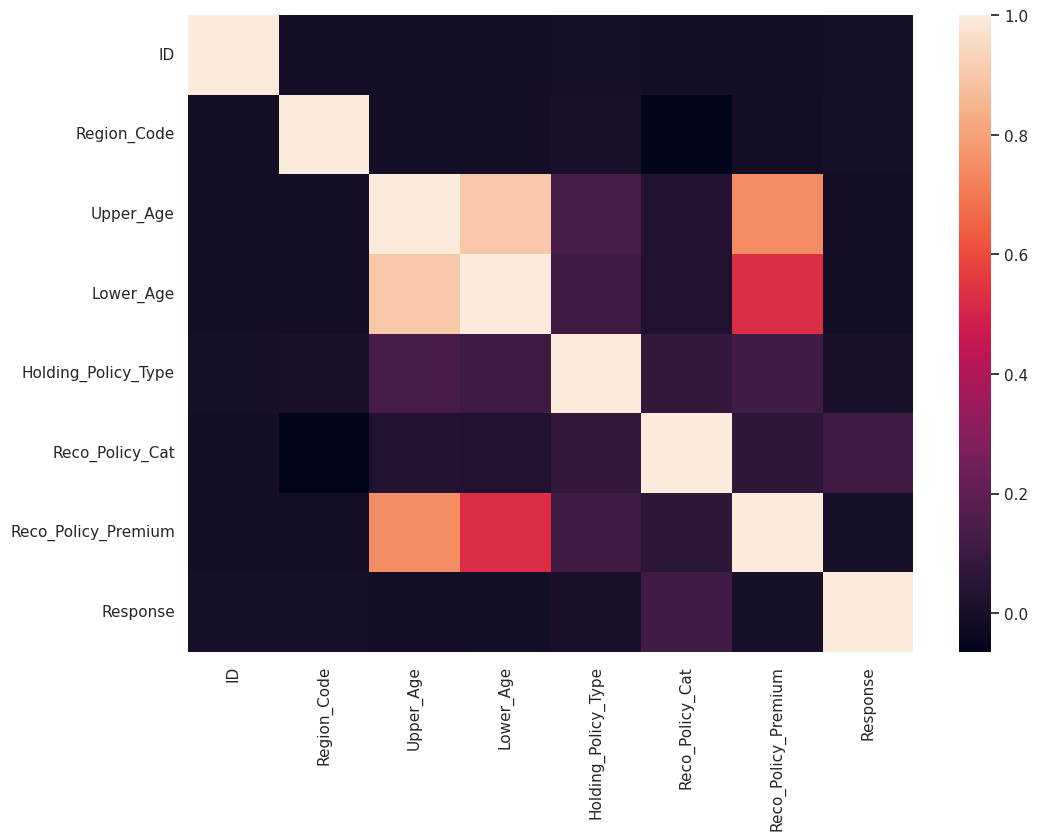

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
# DROPPING COLUMNS WITH HIGH CORRELATION
data_original = data.copy()
data=data.drop(columns=['Upper_Age']) #INCREASE ACCURACY, as high correlation with lower_age
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,No,X2,3,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,No,X2,5,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,73,Yes,X4,9,4.0,17,29344.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,No,X3,2,1.0,20,13574.0,1
50878,50879,C5,4188,Rented,Individual,27,No,X3,7,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,49,No,X2,2,2.0,16,28179.2,1


In [ ]:
data_original

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9,4.0,17,29344.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2,1.0,20,13574.0,1
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1


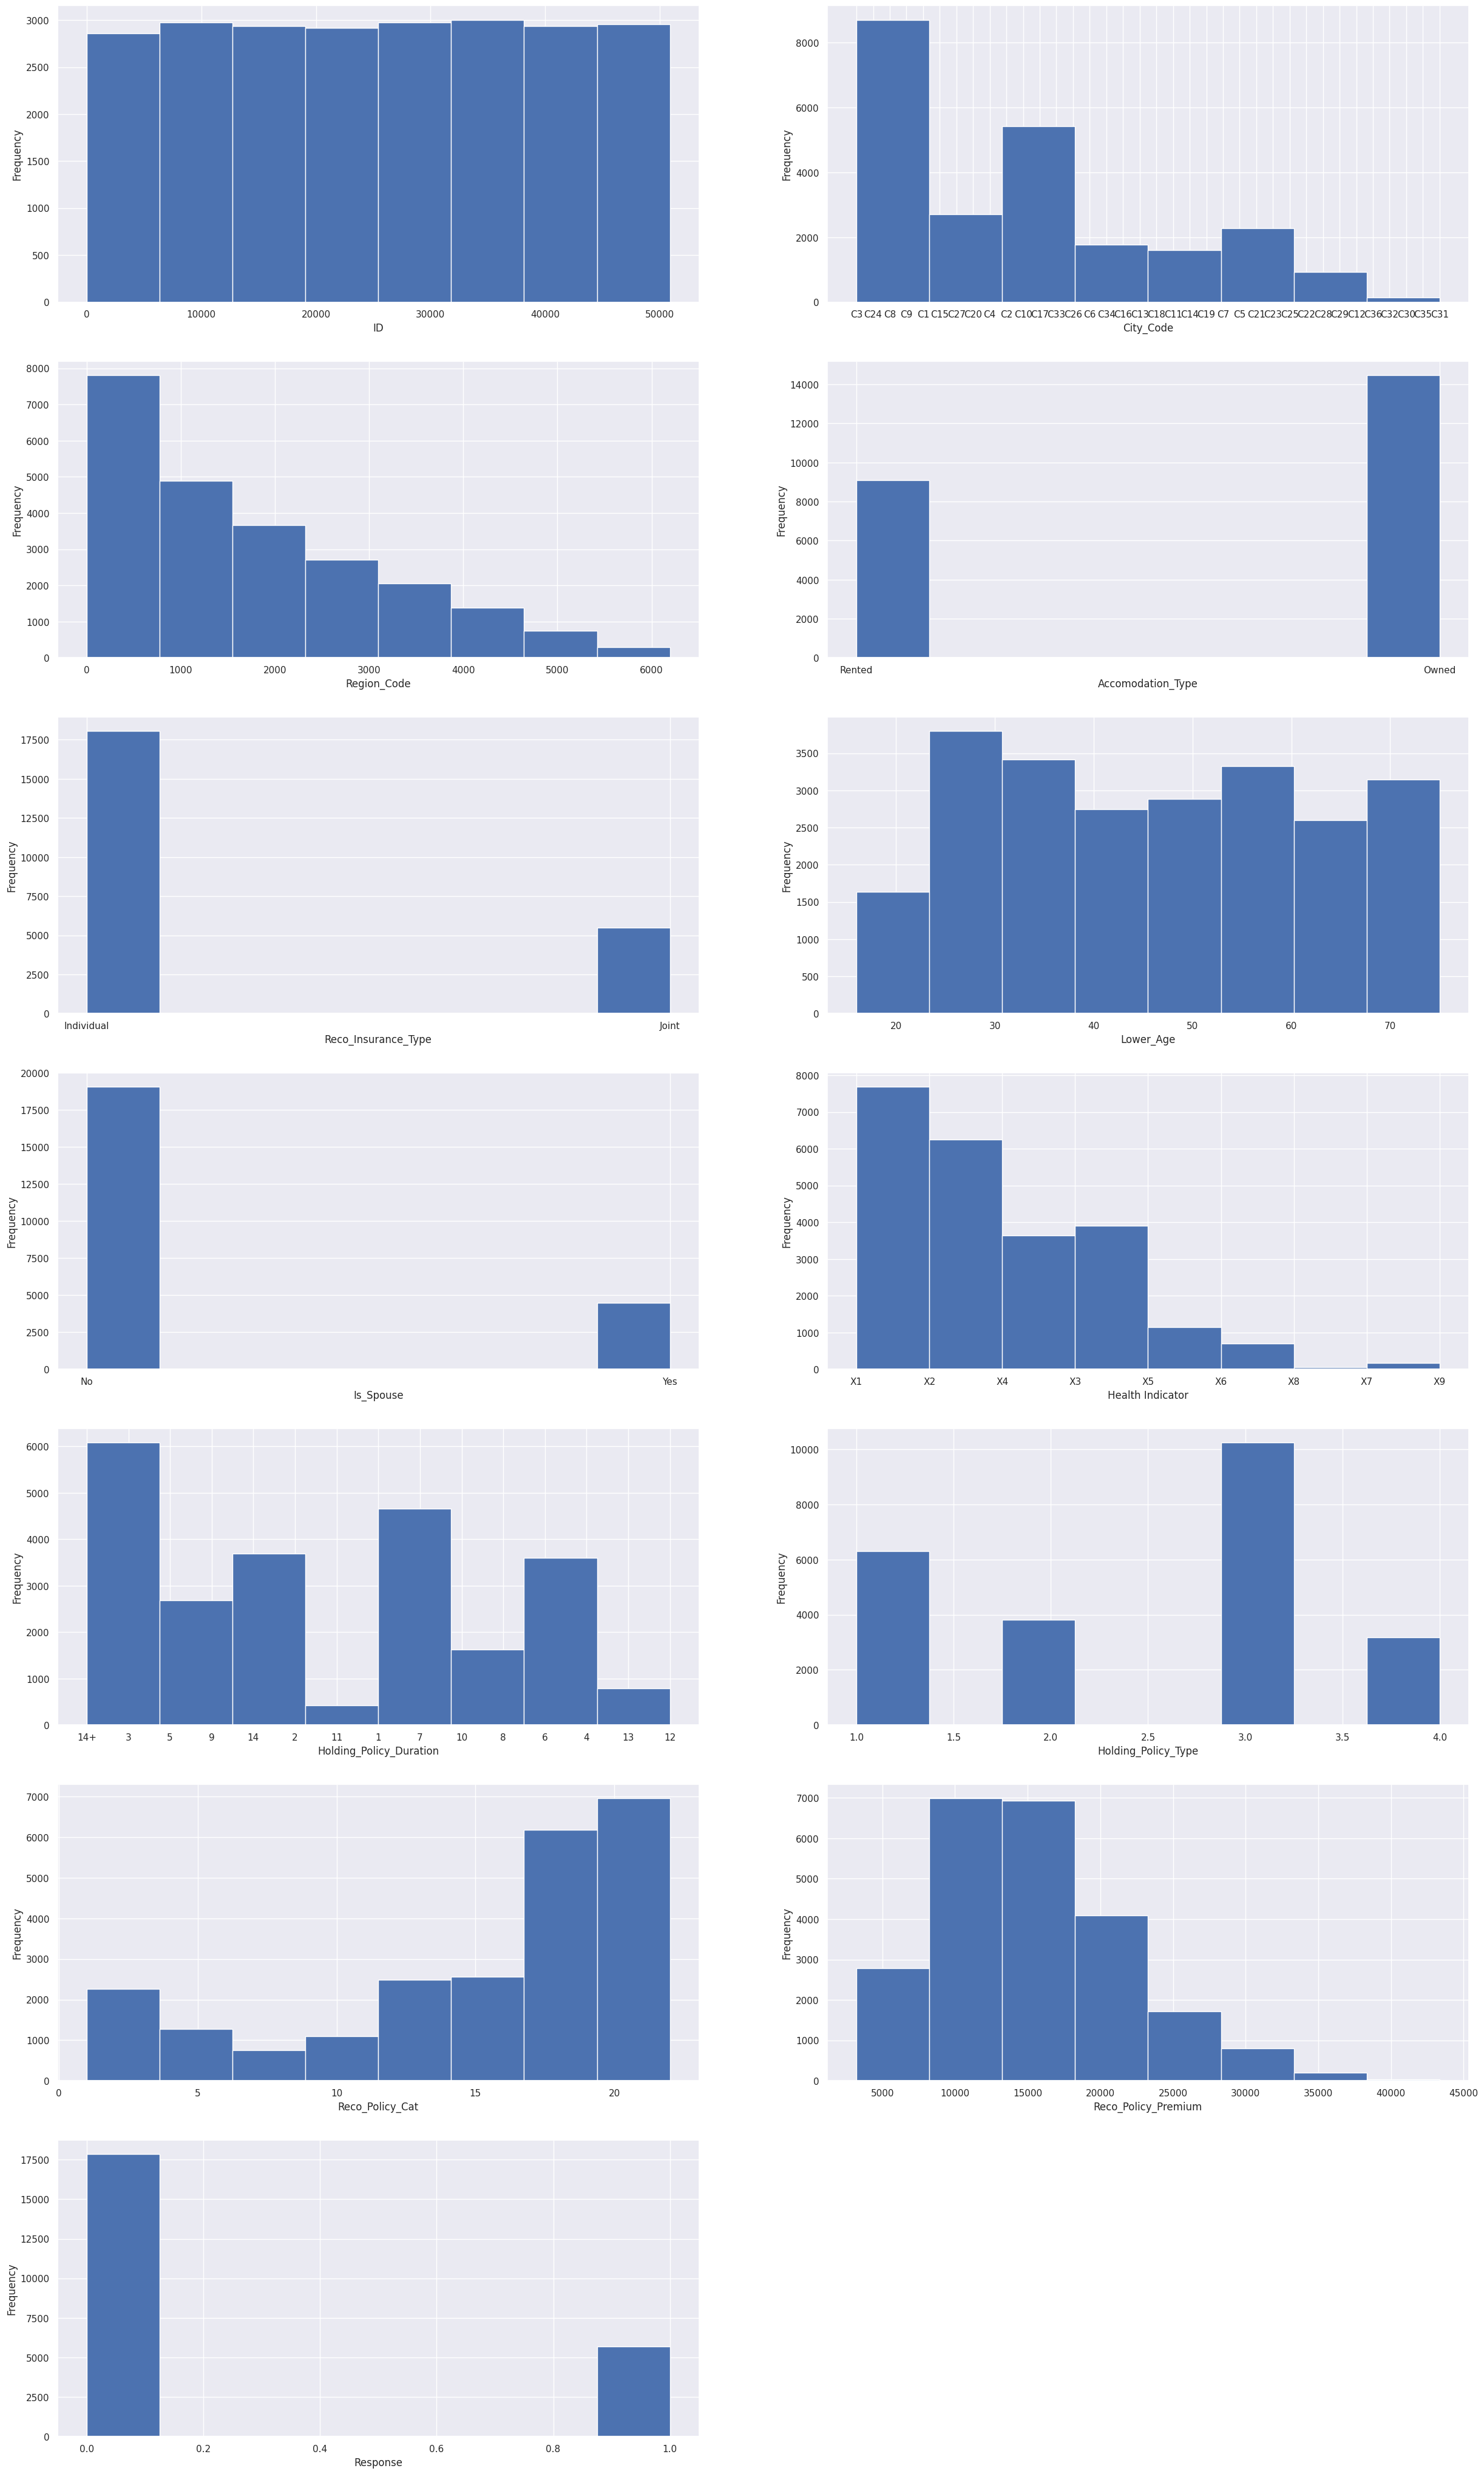

In [ ]:
#HISTOGRAM OF EACH FEATURE
#each plot representing each attribute and its corresponding histogram
plt.figure(figsize=(30, 52))
for col_index in range(0, len(data.columns)):
    values_to_plot = data[data.columns[col_index]].values
    plt.subplot(7, 2, col_index + 1)
    plt.hist(values_to_plot, bins=8)
    plt.xlabel(data.columns[col_index])
    plt.ylabel('Frequency')

In [ ]:
#SPLITTING INPUT AND OUTPUT
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

#ENCODING THE CATEGORICAL VARIABLES
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
lb = LabelEncoder()
columns = data.columns

X[:,columns.get_loc('City_Code')] = lb.fit_transform(X[:,columns.get_loc('City_Code')])
X[:,columns.get_loc('Accomodation_Type')] = lb.fit_transform(X[:,columns.get_loc('Accomodation_Type')])
X[:,columns.get_loc('Reco_Insurance_Type')] = lb.fit_transform(X[:,columns.get_loc('Reco_Insurance_Type')])
X[:,columns.get_loc('Health Indicator')] = lb.fit_transform(X[:,columns.get_loc('Health Indicator')])
X[:,columns.get_loc('Is_Spouse')] = lb.fit_transform(X[:,columns.get_loc('Is_Spouse')])
X[X=='14+']='14' #replacing string 14+ to 14 so that all data values are numerical




print(X)


[[1 22 3213 ... 3.0 22 11628.0]
 [4 16 4378 ... 3.0 19 17780.0]
 [5 34 2190 ... 1.0 16 10404.0]
 ...
 [50880 0 442 ... 1.0 12 11374.0]
 [50881 0 4 ... 2.0 16 28179.2]
 [50882 22 3866 ... 3.0 18 11424.0]]


In [ ]:
# ***SPLITTING INTO TESTING AND TRAINING DATA***

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)



# ***FEATURE SCALING***
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#standardise by removing mean and variance 1
# newvalue = (oldvalue - mean)/standarddeviation

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_classifier = QDA(store_covariance=True)
qda_classifier.fit(X_train, Y_train)

# Predicting the Test set results
predicted_labels = qda_classifier.predict(X_test)
accuracy_qda = qda_classifier.score(X_test, Y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_labels)
print("Confusion Matrix using QDA \n", cm)
print("Accuracy using QDA\t", accuracy)

Confusion Matrix using QDA 
 [[4316  160]
 [1352   59]]
Accuracy using QDA	 0.849009900990099


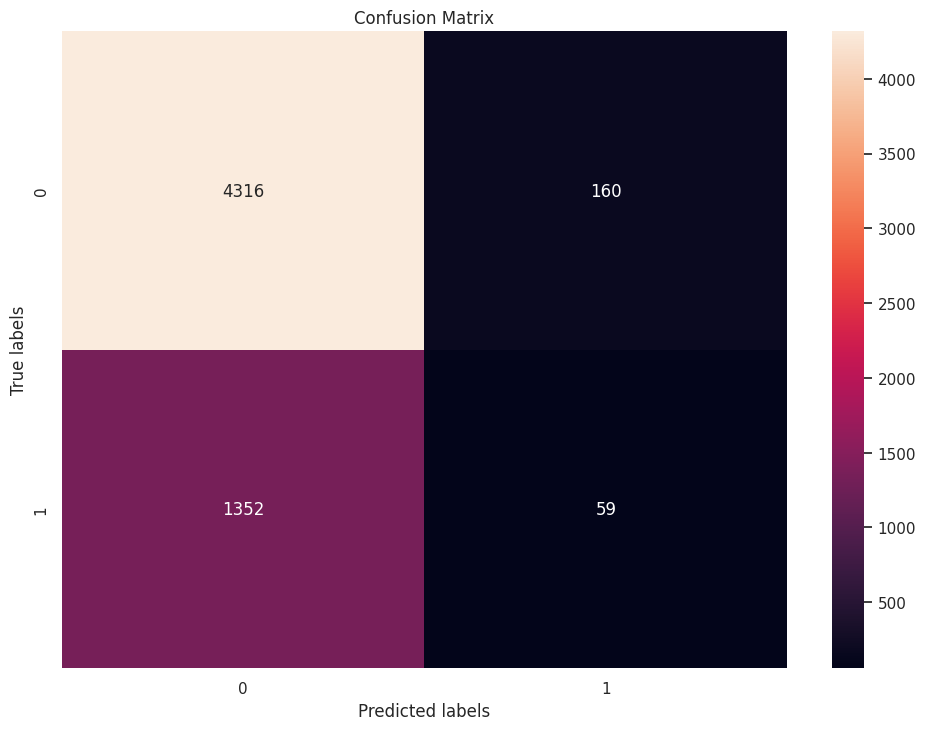

In [ ]:
# CONFUSION MATRIX
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_classifier = KNN(n_neighbors=14, metric='minkowski', p=2)  # Euclidean metric distance
knn_classifier.fit(X_train, Y_train)
y_pred_knn = knn_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_knn)

accuracy_knn = knn_classifier.score(X_test, Y_test)
print("Model accuracy using k-NN:", accuracy)
print("Confusion matrix using k-NN:\n", cm)

Model accuracy using k-NN: 0.7550535077288941
Confusion matrix using k-NN:
 [[4423   53]
 [1389   22]]


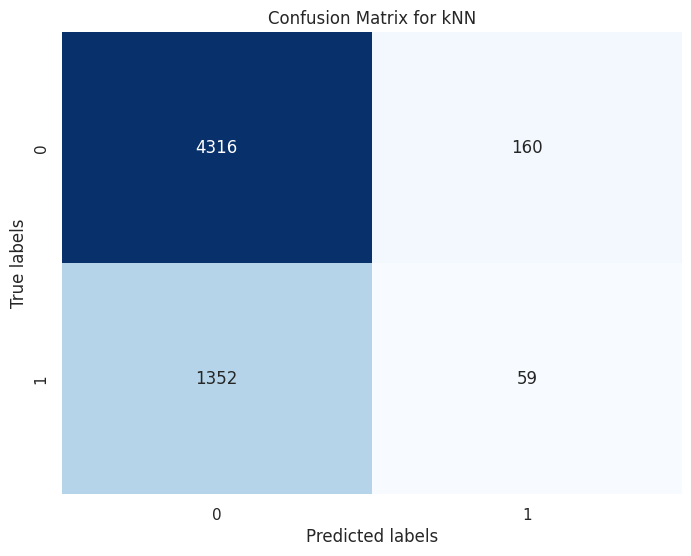

In [ ]:
# Plot Confusion Matrix for kNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kNN')
plt.show()

In [ ]:
best_neighbors = 2
best_accu = 0
trainaccuracies = []
testaccuracies = []

for neighbors in range(2, 15):
    classifier_n = KNN(n_neighbors=neighbors, metric='minkowski', p=2)
    classifier_n.fit(X_train, Y_train)
    Y_trainpred = classifier_n.predict(X_train)
    Y_testpred = classifier_n.predict(X_test)
    traincm = confusion_matrix(Y_trainpred, Y_train)
    testcm = confusion_matrix(Y_testpred, Y_test)
    trainaccuracy = np.trace(traincm)/np.sum(traincm)
    testaccuracy = np.trace(testcm)/np.sum(testcm)
    trainaccuracies.append(trainaccuracy)
    testaccuracies.append(testaccuracy)
    if testaccuracy>best_accu:
        best_accu = testaccuracy
        best_neighbors = neighbors

print(trainaccuracies, testaccuracies)

[0.8202253553026443, 0.823679293358247, 0.7880640960308023, 0.7872147670007361, 0.7730592831662986, 0.7741350999377159, 0.7673404676971859, 0.7686993941452919, 0.7635467980295566, 0.7630372006115169, 0.760998810939358, 0.7607723231980069, 0.7598097502972652] [0.7322914897231187, 0.6823509427552233, 0.7353490742313572, 0.7037540343128929, 0.7384066587395958, 0.7190419568540852, 0.7421437064718872, 0.72974350263292, 0.7494479361304569, 0.7424834380839137, 0.7542041786988279, 0.7482588754883642, 0.7550535077288941]


14


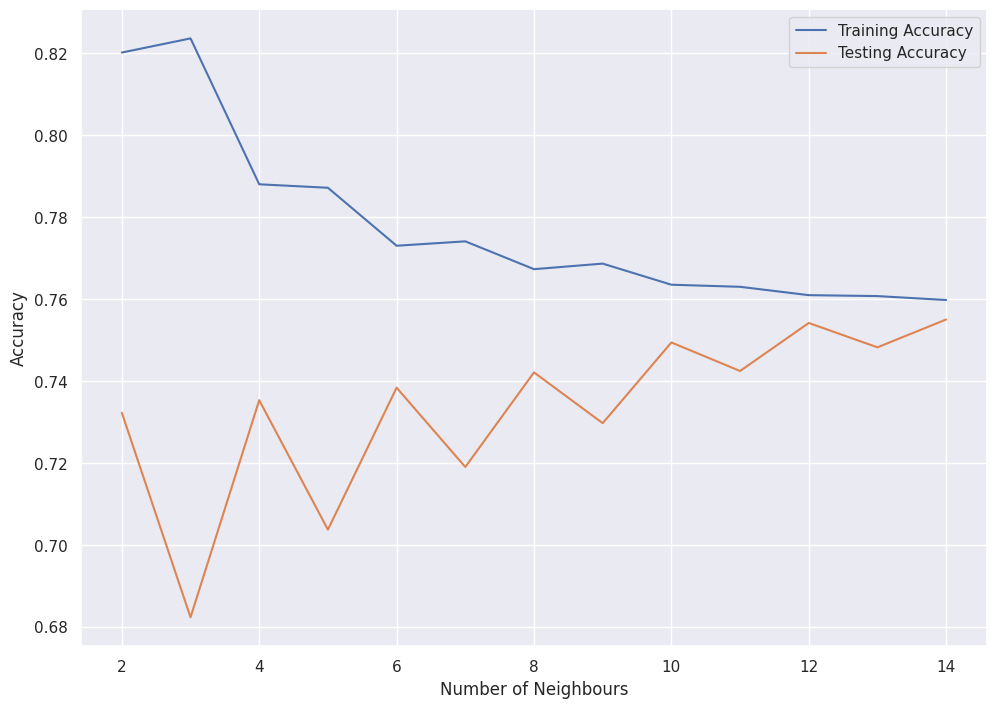

In [ ]:
plt.plot([i for i in range(2,15)],trainaccuracies, label = 'Training Accuracy')
plt.plot([i for i in range(2,15)],testaccuracies, label = 'Testing Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.legend()
print(best_neighbors)

In [ ]:
best_p_custom = 2
best_accuracy_custom = 0
train_accuracies_custom = []
test_accuracies_custom = []

for p_custom in range(2, 15):
    classifier_n_custom = KNN(n_neighbors=14, metric='minkowski', p=p_custom)
    classifier_n_custom.fit(X_train, Y_train)
    Y_train_pred_custom = classifier_n_custom.predict(X_train)
    Y_test_pred_custom = classifier_n_custom.predict(X_test)
    train_cm_custom = confusion_matrix(Y_train_pred_custom, Y_train)
    test_cm_custom = confusion_matrix(Y_test_pred_custom, Y_test)
    train_accuracy_custom = np.trace(train_cm_custom) / np.sum(train_cm_custom)
    test_accuracy_custom = np.trace(test_cm_custom) / np.sum(test_cm_custom)
    train_accuracies_custom.append(train_accuracy_custom)
    test_accuracies_custom.append(test_accuracy_custom)
    if test_accuracy_custom > best_accuracy_custom:
        best_accuracy_custom = test_accuracy_custom
        best_p_custom = p_custom

print(train_accuracies_custom, test_accuracies_custom)


[0.7598097502972652, 0.7585640677198346, 0.7581110922371327, 0.7583375799784836, 0.7587905554611857, 0.7596398844912519, 0.7594133967499009, 0.7590170432025367, 0.7592435309438876, 0.7585640677198346, 0.7588471773965234, 0.7588471773965234, 0.7591302870732122] [0.7550535077288941, 0.7533548496687617, 0.752845252250722, 0.752845252250722, 0.7526753864447087, 0.7523356548326822, 0.7533548496687617, 0.7533548496687617, 0.7533548496687617, 0.7536945812807881, 0.7545439103108544, 0.7542041786988279, 0.7548836419228809]


2


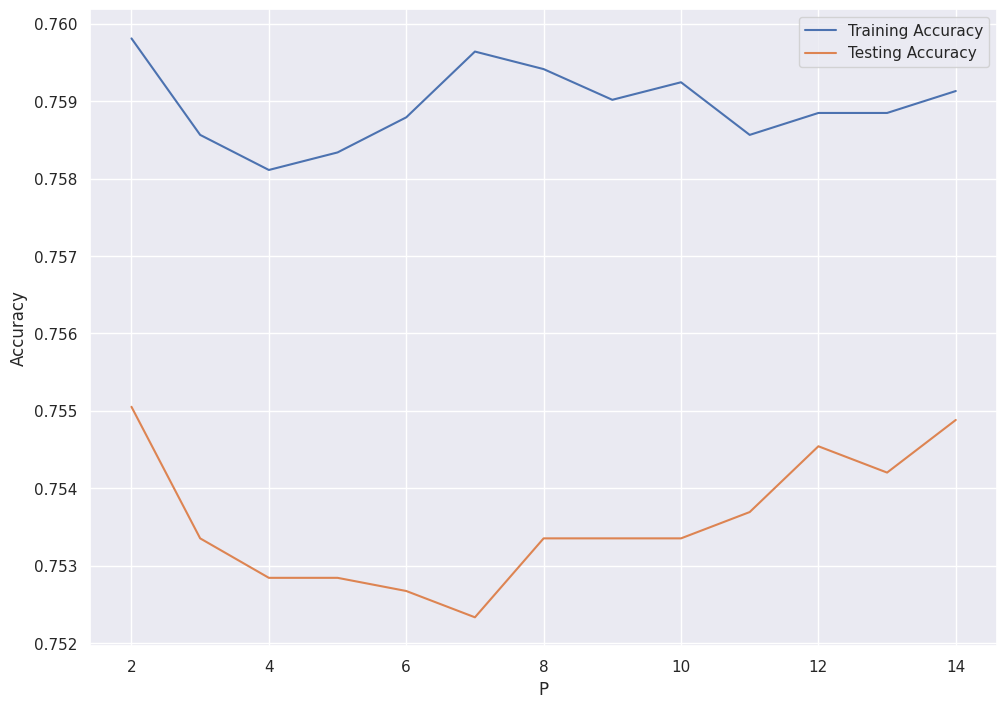

In [ ]:
plt.plot([i for i in range(2,15)],train_accuracies_custom, label = 'Training Accuracy')
plt.plot([i for i in range(2,15)],test_accuracies_custom, label = 'Testing Accuracy')
plt.xlabel('P')
plt.ylabel('Accuracy')
plt.legend()
print(best_p_custom) #accuracy max at 2, for  much larger p increases